# Setup 
Mounting with Google Drive and import FER-2013 dataset

In [2]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'Others/CNN/EmotionDetection/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

%cd /content/drive/My\ Drive/$FOLDERNAME

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Others/CNN/EmotionDetection


In [5]:
# Setup cell.
import numpy as np
import matplotlib.pyplot as plt
from utils.classifiers.cnn import *
from utils.data_utils import get_FER2013_data
from utils.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from utils.layers import *
from utils.fast_layers import *
from utils.solver import Solver
from utils import *


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [ ]:
# Load the FER-2013 data.
data = get_FER2013_data()
for k, v in list(data.items()):
    print(f"{k}: {v.shape}")

X_train: (28709, 3, 48, 48)
y_train: (28709,)
X_val: (100, 3, 48, 48)
y_val: (100,)
X_test: (7078, 3, 48, 48)
y_test: (7078,)


# Three Layer Convolutional Network from CS231N
conv - relu - 2x2 max pool - affine - relu - affine - softmax

In [ ]:
from utils.classifiers.cnn  import *

model = ThreeLayerConvNet(weight_scale=1e-2, hidden_dim=256, reg=0.001)
solver = Solver(
    model,
    data,
    num_epochs=10,
    batch_size=16,
    update_rule='adam',
    optim_config={'learning_rate': 1e-4},
    verbose=True,
    print_every=100,
)
solver.train()

(Iteration 1 / 17940) loss: 2.399097
(Epoch 0 / 10) train acc: 0.150000; val_acc: 0.150000
(Iteration 101 / 17940) loss: 1.773630
(Iteration 201 / 17940) loss: 1.730709
(Iteration 301 / 17940) loss: 1.878641
(Iteration 401 / 17940) loss: 1.872846
(Iteration 501 / 17940) loss: 1.584386
(Iteration 601 / 17940) loss: 1.079733
(Iteration 701 / 17940) loss: 1.652692
(Iteration 801 / 17940) loss: 1.539489
(Iteration 901 / 17940) loss: 1.629950
(Iteration 1001 / 17940) loss: 1.385599
(Iteration 1101 / 17940) loss: 1.755043
(Iteration 1201 / 17940) loss: 1.668481
(Iteration 1301 / 17940) loss: 1.916072
(Iteration 1401 / 17940) loss: 2.104347
(Iteration 1501 / 17940) loss: 1.479724
(Iteration 1601 / 17940) loss: 1.808767
(Iteration 1701 / 17940) loss: 1.494986
(Epoch 1 / 10) train acc: 0.469000; val_acc: 0.490000
(Iteration 1801 / 17940) loss: 1.332074
(Iteration 1901 / 17940) loss: 1.627656
(Iteration 2001 / 17940) loss: 1.598147
(Iteration 2101 / 17940) loss: 1.602137
(Iteration 2201 / 17940)

In [ ]:
# Print final training accuracy.
print(
    "Full data training accuracy:",
    solver.check_accuracy(data['X_train'], data['y_train'])
)

Full data training accuracy: 0.7111358807342645


In [ ]:
# Print final validation accuracy.
print(
    "Full data validation accuracy:",
    solver.check_accuracy(data['X_val'], data['y_val'])
)

Full data validation accuracy: 0.5


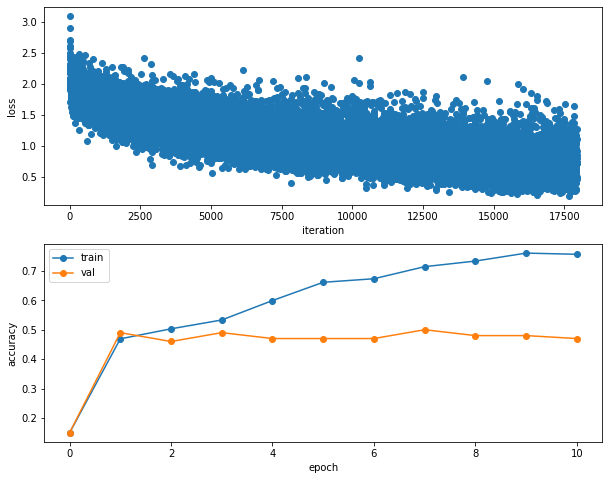

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# Emotion Model
Conv - ReLu - Max - Conv - ReLu - Max - Flatten - Affine - ReLu - Affine - ReLu - Affine - SoftMax

In [ ]:
from utils.classifiers.emotion_model  import *
model = EmotionModel(weight_scale=1e-2, hidden_dim=256, reg=0.001)
solver = Solver(
    model,
    data,
    num_epochs=10,
    batch_size=16,
    update_rule='adam',
    optim_config={'learning_rate': 1e-4},
    verbose=True,
    print_every=100,
)
solver.train()

(Iteration 1 / 17940) loss: 2.039845
(Epoch 0 / 10) train acc: 0.199000; val_acc: 0.290000
(Iteration 101 / 17940) loss: 1.755219
(Iteration 201 / 17940) loss: 1.778436
(Iteration 301 / 17940) loss: 1.890450
(Iteration 401 / 17940) loss: 1.717983
(Iteration 501 / 17940) loss: 1.775428
(Iteration 601 / 17940) loss: 1.488618
(Iteration 701 / 17940) loss: 1.699900
(Iteration 801 / 17940) loss: 1.580542
(Iteration 901 / 17940) loss: 1.744025
(Iteration 1001 / 17940) loss: 1.583373
(Iteration 1101 / 17940) loss: 1.595370
(Iteration 1201 / 17940) loss: 1.581243
(Iteration 1301 / 17940) loss: 1.743648
(Iteration 1401 / 17940) loss: 1.661200
(Iteration 1501 / 17940) loss: 1.537050
(Iteration 1601 / 17940) loss: 1.810248
(Iteration 1701 / 17940) loss: 1.416201
(Epoch 1 / 10) train acc: 0.436000; val_acc: 0.430000
(Iteration 1801 / 17940) loss: 1.450915
(Iteration 1901 / 17940) loss: 1.527494
(Iteration 2001 / 17940) loss: 1.569774
(Iteration 2101 / 17940) loss: 1.340738
(Iteration 2201 / 17940)

In [ ]:
# Print final training accuracy.
print(
    "Full data training accuracy:",
    solver.check_accuracy(data['X_train'], data['y_train'])
)

Full data training accuracy: 0.7697237799993033


In [ ]:
# Print final validation accuracy.
print(
    "Full data validation accuracy:",
    solver.check_accuracy(data['X_val'], data['y_val'])
)

Full data validation accuracy: 0.59


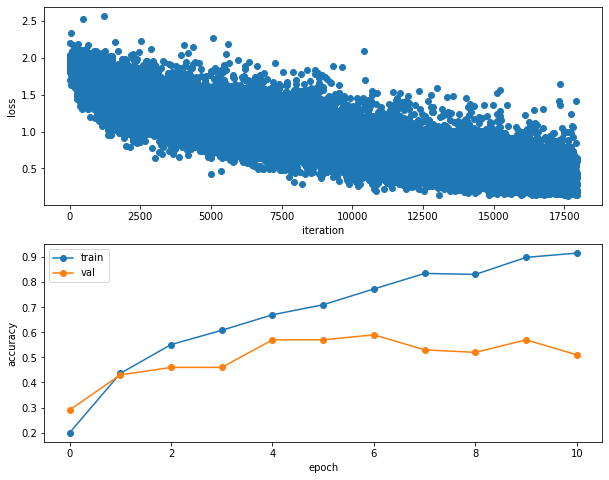

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# Emotion Model with Dropout layer
On top of emotion model, added dropout layer so that the architecture becomes 

Conv - ReLu - Max - Conv - ReLu - Max - Flatten - Affine - ReLu - **Dropout**(0.5) - Affine - ReLu - Affine - SoftMax

In [ ]:
from utils.classifiers.emotion_model_with_dropout import *

model = EmotionModelWithDropout(weight_scale=1e-2, hidden_dim=256, reg=0.001)
solver = Solver(
    model,
    data,
    num_epochs=10,
    batch_size=16,
    update_rule='adam',
    optim_config={'learning_rate': 1e-4},
    verbose=True,
    print_every=100,
)
solver.train()

(Iteration 1 / 17940) loss: 2.031614
(Epoch 0 / 10) train acc: 0.154000; val_acc: 0.230000
(Iteration 101 / 17940) loss: 1.881192
(Iteration 201 / 17940) loss: 1.852349
(Iteration 301 / 17940) loss: 2.427777
(Iteration 401 / 17940) loss: 1.750935
(Iteration 501 / 17940) loss: 1.836038
(Iteration 601 / 17940) loss: 1.758566
(Iteration 701 / 17940) loss: 1.774250
(Iteration 801 / 17940) loss: 1.529267
(Iteration 901 / 17940) loss: 1.244393
(Iteration 1001 / 17940) loss: 2.013200
(Iteration 1101 / 17940) loss: 1.294109
(Iteration 1201 / 17940) loss: 1.329643
(Iteration 1301 / 17940) loss: 2.150568
(Iteration 1401 / 17940) loss: 1.641098
(Iteration 1501 / 17940) loss: 1.407318
(Iteration 1601 / 17940) loss: 1.659158
(Iteration 1701 / 17940) loss: 1.833007
(Epoch 1 / 10) train acc: 0.426000; val_acc: 0.440000
(Iteration 1801 / 17940) loss: 1.839520
(Iteration 1901 / 17940) loss: 1.565166
(Iteration 2001 / 17940) loss: 1.575012
(Iteration 2101 / 17940) loss: 1.190863
(Iteration 2201 / 17940)

In [ ]:
# Print final training accuracy.
print(
    "Full data training accuracy:",
    solver.check_accuracy(data['X_train'], data['y_train'])
)

Full data training accuracy: 0.6889477167438782


In [ ]:
# Print final validation accuracy.
print(
    "Full data validation accuracy:",
    solver.check_accuracy(data['X_val'], data['y_val'])
)

Full data validation accuracy: 0.54


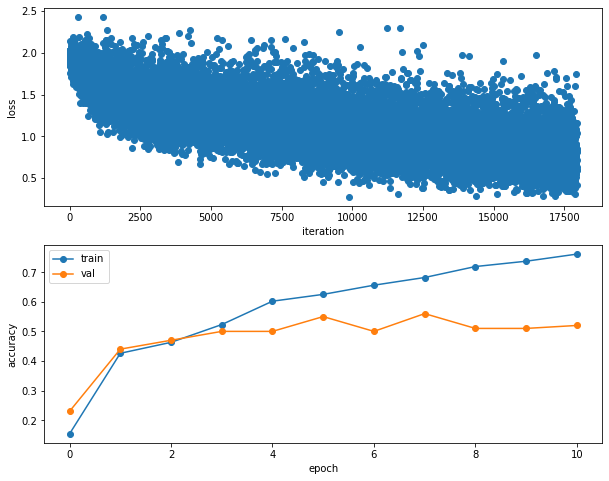

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# Emotion Model with Dropout layer and learning decay

In [7]:
from utils.classifiers.emotion_model_with_dropout import *

model = EmotionModelWithDropout(weight_scale=1e-2, hidden_dim=256, reg=0.001)
solver = Solver(
    model,
    data,
    num_epochs=10,
    batch_size=16,
    update_rule='adam',
    optim_config={'learning_rate': 1e-4},
    verbose=True,
    print_every=100,
    lr_decay=1e-7
)
solver.train()

(Iteration 1 / 17940) loss: 2.037600
(Epoch 0 / 10) train acc: 0.130000; val_acc: 0.210000
(Iteration 101 / 17940) loss: 1.887249
(Iteration 201 / 17940) loss: 1.986873
(Iteration 301 / 17940) loss: 1.855267
(Iteration 401 / 17940) loss: 1.684182
(Iteration 501 / 17940) loss: 1.653346
(Iteration 601 / 17940) loss: 1.758154
(Iteration 701 / 17940) loss: 1.901150
(Iteration 801 / 17940) loss: 1.351150
(Iteration 901 / 17940) loss: 1.483260
(Iteration 1001 / 17940) loss: 1.760481
(Iteration 1101 / 17940) loss: 1.234964
(Iteration 1201 / 17940) loss: 2.033374
(Iteration 1301 / 17940) loss: 1.901848
(Iteration 1401 / 17940) loss: 1.467981
(Iteration 1501 / 17940) loss: 1.537955
(Iteration 1601 / 17940) loss: 1.471010
(Iteration 1701 / 17940) loss: 1.472181
(Epoch 1 / 10) train acc: 0.439000; val_acc: 0.410000
(Iteration 1801 / 17940) loss: 1.681074
(Iteration 1901 / 17940) loss: 2.035410
(Iteration 2001 / 17940) loss: 1.827090
(Iteration 2101 / 17940) loss: 1.185386
(Iteration 2201 / 17940)

In [8]:
# Print final training accuracy.
print(
    "Full data training accuracy:",
    solver.check_accuracy(data['X_train'], data['y_train'])
)

Full data training accuracy: 0.42819324950363996


In [9]:
# Print final validation accuracy.
print(
    "Full data validation accuracy:",
    solver.check_accuracy(data['X_val'], data['y_val'])
)

Full data validation accuracy: 0.45


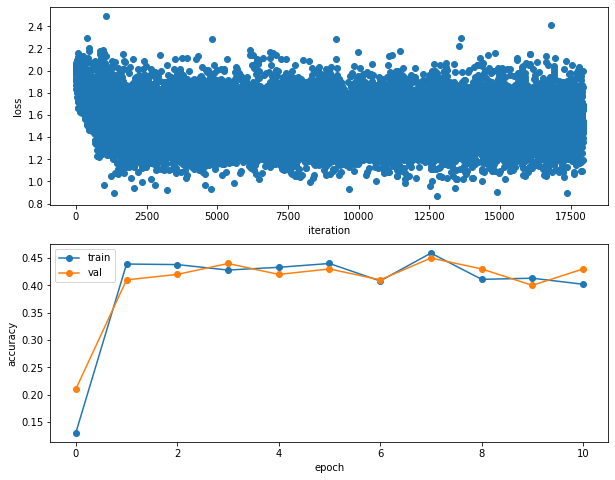

In [10]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()